Cutting the MH budget method refers to Korattikara's 2014 paper

Adaptive MH method refers to Bardenet's 2014 paper

In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.stats import t
from bisect import bisect
import scipy.io
from scipy.stats import norm
import numpy.matlib
%matplotlib inline
import h5py

Logistic Regression Test Result

test parameters : 

nsamps = 5000, minibatchsize = 100, sigma_proposer = 0.05, number of data points = 12007, temperature = 1000.0, cutmh method error bournd = 0.005

In [3]:
# plot test result with Logistic Regression Model
# load data
f2 = h5py.File('logisticdata.mat');
samples1 = np.array(f2['newtestsamples']) 
samples2 = np.array(f2['oldtestsamples'])
samples3 = np.array(f2['cutmhsamples'])
samples4 = np.array(f2['adaptivemhsamples'])
samples5 = np.array(f2['cutmhwithsamples'])
size1 = np.array(f2['newtestsize'])
size2 = np.array(f2['oldtestsize'])
size3 = np.array(f2['cutmhsize'])
size4 = np.array(f2['adaptivemhsize'])
size5 = np.array(f2['cutmhwithsize'])
ll1 = np.array(f2['newtestll'])
ll2 = np.array(f2['oldtestll'])
ll3 = np.array(f2['cutmhll'])
ll4 = np.array(f2['adaptivemhll'])
ll5 = np.array(f2['cutmhwithll'])
acc1 = np.array(f2['newtestacc'])
acc2 = np.array(f2['oldtestacc'])
acc3 = np.array(f2['cutmhacc'])
acc4 = np.array(f2['adaptivemhacc'])
acc5 = np.array(f2['cutmhwithacc'])
bc1c2 = np.array(f2['adaptivemhbc1c2'])

average minibatch size are 100.0 , 909.6802 , 584.9042 , 2730.7516 , 719.6456
Accelerate over old test is 9.096802
Accelerate over cut mh budget test is 5.849042
Accelerate over adaptive mh test is 27.307516
Accelerate over cut mh budget test with decreasing error bound is 7.196456


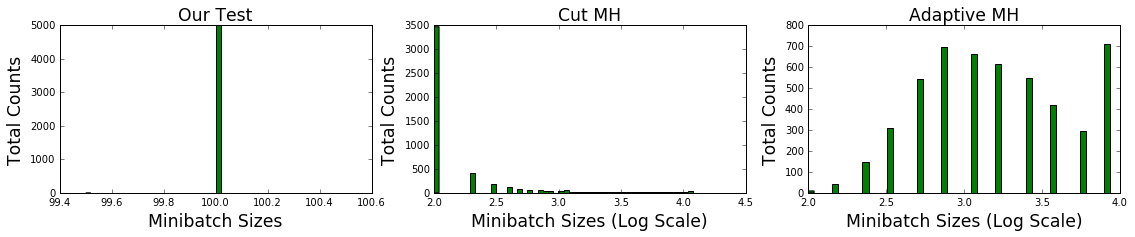

In [4]:
# plot minibatch size distribution
fig, axarr = plt.subplots(1,3, figsize=(19, 3))

axarr[0].set_title("Our Test", size="xx-large")
axarr[0].hist(size1, bins=50, facecolor ='green')
axarr[0].set_xlabel("Minibatch Sizes", size="xx-large")
axarr[0].set_ylabel("Total Counts", size="xx-large")
'''
axarr[1].set_title("Standard MCMC", size="xx-large")
axarr[1].hist(size2, bins=50, facecolor ='green')
axarr[1].set_xlabel("Minibatch Sizes", size="xx-large")
axarr[1].set_ylabel("Total Counts", size="xx-large")
'''
axarr[1].set_title("Cut MH", size="xx-large")
axarr[1].hist(np.log10(size3), bins=50, facecolor ='green')
axarr[1].set_xlabel("Minibatch Sizes (Log Scale)", size="xx-large")
axarr[1].set_ylabel("Total Counts", size="xx-large")

axarr[2].set_title("Adaptive MH", size="xx-large")
axarr[2].hist(np.log10(size4), bins=50, facecolor ='green')
axarr[2].set_xlabel("Minibatch Sizes (Log Scale)", size="xx-large")
axarr[2].set_ylabel("Total Counts", size="xx-large")

# axarr[4].set_title("Cut MH with Decreasing Error Bound", size="xx-large")
# axarr[4].hist(size5, bins=50, facecolor ='green')
# axarr[4].set_xlabel("Final Minibatch Sizes", size="xx-large")
# axarr[4].set_ylabel("Total Counts", size="xx-large")
print 'average minibatch size are', np.mean(size1), ',', np.mean(size2), ',',np.mean(size3),',', np.mean(size4),',', np.mean(size5)
print "Accelerate over old test is", np.sum(size2)/np.sum(size1)*1.0
print "Accelerate over cut mh budget test is", np.sum(size3)/np.sum(size1)*1.0
print "Accelerate over adaptive mh test is", np.sum(size4)/np.sum(size1)*1.0
print "Accelerate over cut mh budget test with decreasing error bound is", np.sum(size5)/np.sum(size1)*1.0
plt.savefig('../figures/LogisticRegressionResult/minibatch_size_logistic.png', dpi=600)

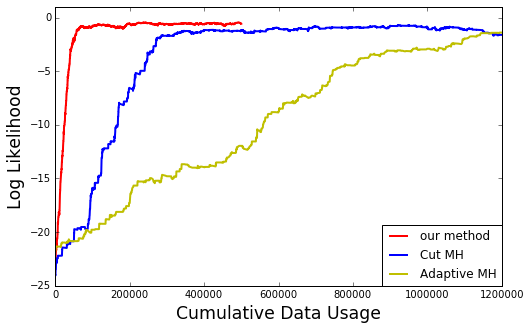

In [103]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(size1).reshape([5000,1]), ll1.reshape([5000,1]), 'r', label = 'our method', linewidth=2.0)
plt.hold()
# plt.plot(np.cumsum(size2).reshape([5000,1]), ll2.reshape([5000,1]), 'g', label = 'old method', linewidth=2.0)
plt.plot(np.cumsum(size3).reshape([5000,1]), ll3.reshape([5000,1]), 'b', label = 'Cut MH', linewidth=2.0)
plt.plot(np.cumsum(size4).reshape([5000,1]), ll4.reshape([5000,1]), 'y', label = 'Adaptive MH', linewidth=2.0)
# plt.plot(np.cumsum(size5).reshape([5000,1]), ll5.reshape([5000,1]), 'purple', label = 'cut mh budget with decreasing error bound', linewidth=2.0)
axes = plt.gca()
axes.set_xlim([0.0, 1200000])
axes.set_ylim([-25,1])
axes.set_xlabel("Cumulative Data Usage", size = "xx-large")
axes.set_ylabel("Log Likelihood", size = "xx-large")
plt.legend(loc=0, borderaxespad=0)
plt.show()
plt.savefig('../figures/LogisticRegressionResult/ll_logistic.png', dpi=600)

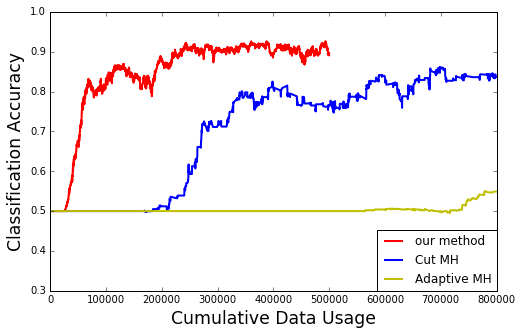

In [109]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(size1).reshape([5000,1]), acc1.reshape([5000,1]), 'r', label = 'our method', linewidth=2.0)
plt.hold()
# plt.plot(np.cumsum(size2).reshape([5000,1]), acc2.reshape([5000,1]), 'g', label = 'old method', linewidth=2.0)
plt.plot(np.cumsum(size3).reshape([5000,1]), acc3.reshape([5000,1]), 'b', label = 'Cut MH', linewidth=2.0)
plt.plot(np.cumsum(size4).reshape([5000,1]), acc4.reshape([5000,1]), 'y', label = 'Adaptive MH', linewidth=2.0)
# plt.plot(np.cumsum(size5).reshape([5000,1]), acc5.reshape([5000,1]), 'purple', label = 'cut mh budget with decreasing error bound', linewidth=2.0)
axes = plt.gca()
axes.set_xlim([0, 800000])
axes.set_ylim([0.3,1])
axes.set_xlabel("Cumulative Data Usage", size = "xx-large")
axes.set_ylabel("Classification Accuracy", size = "xx-large")
plt.legend(loc=4, borderaxespad=0.)
plt.show()
plt.savefig('../figures/LogisticRegressionResult/acc_logistic.png', dpi=600)

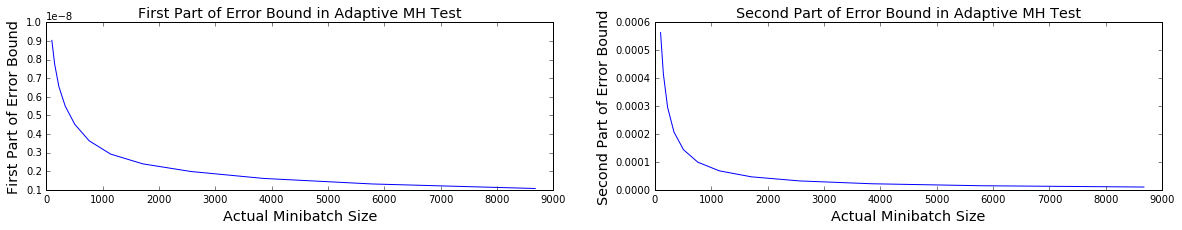

In [6]:
batch_size = bc1c2[:,0]
c1 = bc1c2[:,1]
c2 = bc1c2[:,2]

avg_c1 = np.zeros(int(np.max(batch_size)))
avg_c2 = np.zeros(int(np.max(batch_size)))
for b in range(100, int(np.max(batch_size))+1):
    index = [i for i in xrange(len(batch_size)) if batch_size[i] == b]
    if len(index) > 0:
        avg_c1[b-1] = np.mean(c1[index])
        avg_c2[b-1] = np.mean(c2[index])
    
index = [i for i in xrange(len(avg_c1)) if ( avg_c1[i] !=0 and avg_c2[i] != 0 )]
c1_final = avg_c1[index]
c2_final = avg_c2[index]
batchsize = np.linspace(1,int(np.max(batch_size)), int(np.max(batch_size)))
batch_final = batchsize[index]

fig, axarr = plt.subplots(1,2, figsize=(20, 3))
axarr[0].set_title("First Part of Error Bound in Adaptive MH Test", size="x-large")
axarr[0].plot(batch_final, c1_final)
axarr[0].set_xlabel("Actual Minibatch Size", size="x-large")
axarr[0].set_ylabel("First Part of Error Bound", size="x-large")

axarr[1].set_title("Second Part of Error Bound in Adaptive MH Test", size="x-large")
axarr[1].plot(batch_final, c2_final)
axarr[1].set_xlabel("Actual Minibatch Size", size="x-large")
axarr[1].set_ylabel("Second Part of Error Bound", size="x-large")
plt.savefig('../figures/LogisticRegressionResult/first_second_part_logistic.png', dpi=800)